In [1]:
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import brewer2mpl


def emotion_count(y_train, classes):
    """
    The function re-classify picture with disgust label into angry label
    """
    emo_classcount = {}
    print ('Disgust classified as Angry')
    
    ############# TODO: re-label disgust label to angry
    y_train.loc[y_train == 1] = 0
    classes.remove('Disgust')
    ###################################################

    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount


def load_data(usage='Training', classes=['Angry','Happy'], filepath='fer2013-1.csv'):
    """
    The function load provided CSV dataset and further reshape, rescale the data for feeding
    """
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]
    frames = []
    classes.append('Disgust')
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)))
    data = data.loc[rows]
    x = list(data["pixels"])
    X = []
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        
        X.append(each_pixel)
    ############ TODO: reshape into 48*48*1 and rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255
    ###################################################    
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

Using TensorFlow backend.


In [2]:
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emo     = ['Angry', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']

file_path = 'fer2013-1.csv'

########## TODO: load three sets of data: train, test, validation
### Hint: find x_train, y_train, x_val, y_val, x_test, y_test
###       using load_data function
X_test, y_test = load_data(classes=emo, usage='PrivateTest', filepath=file_path)
X_train, y_train = load_data(classes=emo, usage='Training', filepath=file_path)
X_val,y_val = load_data(classes=emo, usage='PublicTest', filepath=file_path)
#################################################################

Disgust classified as Angry
Disgust classified as Angry
Disgust classified as Angry


In [3]:
def save_data(X_test, y_test, fname=''):
    """
    The function stores loaded data into numpy form for further processing
    """
    np.save( 'X_test' + fname, X_test)
    np.save( 'y_test' + fname, y_test)
save_data(X_test, y_test,"_privatetest6_100pct")
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'
###################### TODO: load images and labels in X and y variables
X = np.load(X_fname)
y = np.load(y_fname)
########################################################################
print ('Private test set')
y_labels = [np.argmax(lst) for lst in y]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print (labels)
print (counts)

Private test set
['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
[545 527 879 593 415 624]


In [4]:
print(y)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


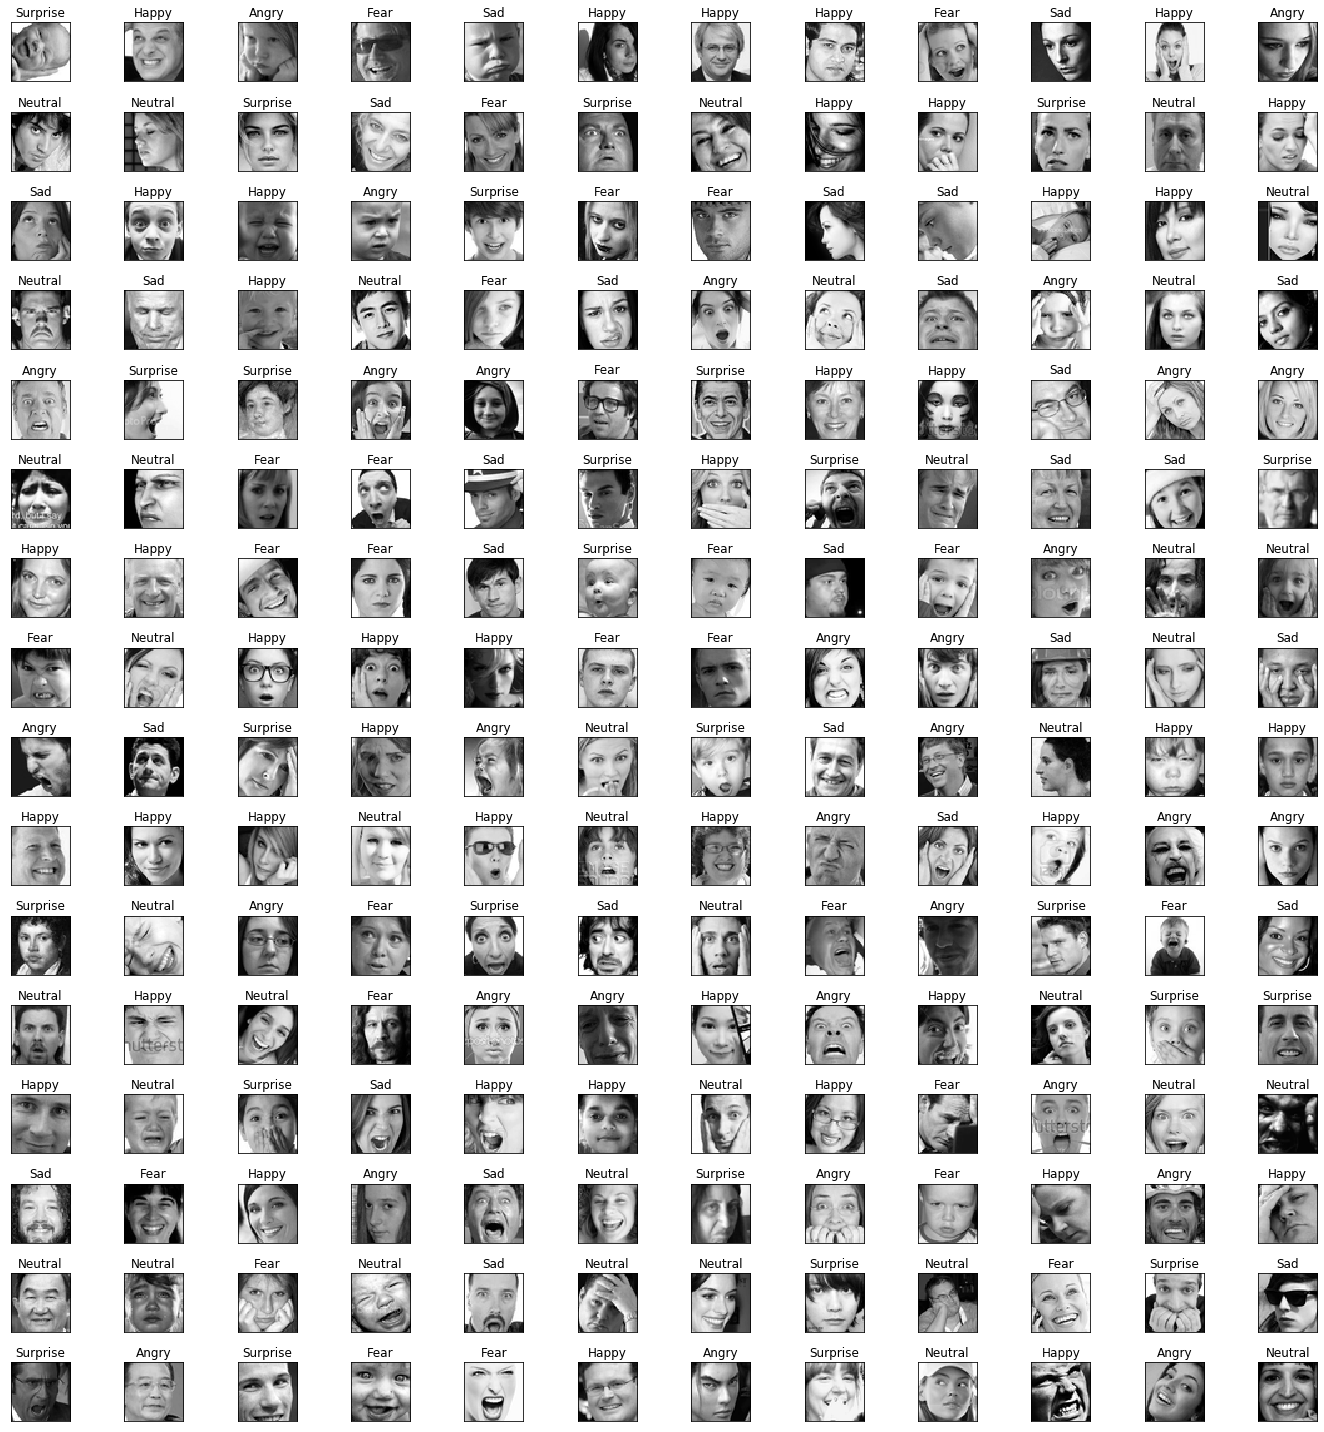

In [5]:
def overview(start, end, X):
    ######### TODO: make a list of labels for each image
    Label_y = list()
    for i in y_labels:
        Label_y.append(emo[i])
    ####################################################

    """
    The function is used to plot first several pictures for overviewing inputs format
    """
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        ######### TODO: label each image with emotion
        ##### Hint: use Label_y list you just created
        ax.set_title(Label_y[i])
        #############################################
        
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,191, X_train)

(1, 48, 48, 1)


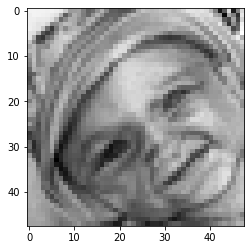

In [9]:
######### TODO: choose one image and print its size and display it
input_img = X[6:7,:,:,:] 
print (input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()
##################################################################